<a href="https://colab.research.google.com/github/JuanLara18/Actuarial-DataMined-Provisiones/blob/main/notebooks/Actuarial_Reserving_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data can be download [here](https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p).

# Data Understanding

We are importing essential libraries and loading a dataset from a CSV file named "wkcomp_pos.csv." These libraries include pandas for data manipulation, matplotlib.pyplot for plotting, seaborn for enhancing data visualization, and numpy for numerical operations. This initial step is crucial for our data analysis and visualization process.

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("wkcomp_pos.csv")

### Basic information

Display basic information about the dataset

In [96]:
print("Dataset Information:")
print("Number of Records:", data.shape[0])
print("Number of Attributes:", data.shape[1])

Dataset Information:
Number of Records: 13200
Number of Attributes: 13


Display data types of attributes

In [97]:
print("\nData Types of Attributes:")
print(data.dtypes)


Data Types of Attributes:
GRCODE                int64
GRNAME               object
AccidentYear          int64
DevelopmentYear       int64
DevelopmentLag        int64
IncurLoss_D           int64
CumPaidLoss_D         int64
BulkLoss_D            int64
EarnedPremDIR_D       int64
EarnedPremCeded_D     int64
EarnedPremNet_D       int64
Single                int64
PostedReserve97_D     int64
dtype: object



While exploring the dataset, we noticed that the "GRNAME" variable, categorized as "object," exclusively contains non-numeric values. As expected, all other variables are integers. Upon printing some of the "GRNAME" values, it became clear that they effectively represent company names.

Now, we check unique values and coding schemes for specific attributes

In [98]:
print("\nCoding Schemes:")
print("Number of unique values in 'GRCODE':", len(data['GRCODE'].unique()))
print("Number of unique values in 'GRNAME':", len(data['GRNAME'].unique()))
print("Number of unique values in 'AccidentYear':", len(data['AccidentYear'].unique()))
print("Number of unique values in 'DevelopmentYear':", len(data['DevelopmentYear'].unique()))


Coding Schemes:
Number of unique values in 'GRCODE': 132
Number of unique values in 'GRNAME': 132
Number of unique values in 'AccidentYear': 10
Number of unique values in 'DevelopmentYear': 19


### Variables

We explore the range of the variables

In [99]:
import warnings

integer_columns = data.select_dtypes(include='int64').columns
integer_columns = data.select_dtypes(include='int64').columns
result = pd.DataFrame(columns=['Column Name', 'Min', 'Max'])
warnings.simplefilter(action='ignore', category=FutureWarning)

# Fill the result
for column in integer_columns:
    min_value = data[column].min()
    max_value = data[column].max()
    result = result.append({'Column Name': column, 'Min': min_value, 'Max': max_value}, ignore_index=True)

# Print the table
print(result)

          Column Name    Min      Max
0              GRCODE     86    44300
1        AccidentYear   1988     1997
2     DevelopmentYear   1988     2006
3      DevelopmentLag      1       10
4         IncurLoss_D    -59   367404
5       CumPaidLoss_D   -338   325322
6          BulkLoss_D  -4621   145296
7     EarnedPremDIR_D  -6518   421223
8   EarnedPremCeded_D  -3522    78730
9     EarnedPremNet_D  -9731   418755
10             Single      0        1
11  PostedReserve97_D      0  1090093


### Quality of the data

Now, we perform initial checks for missing values and data types.

In [100]:
missing_values = data.isnull().sum()
data_types = data.dtypes

print(missing_values)

GRCODE               0
GRNAME               0
AccidentYear         0
DevelopmentYear      0
DevelopmentLag       0
IncurLoss_D          0
CumPaidLoss_D        0
BulkLoss_D           0
EarnedPremDIR_D      0
EarnedPremCeded_D    0
EarnedPremNet_D      0
Single               0
PostedReserve97_D    0
dtype: int64


### Statistics

Here we delve into the exploration of the data set for the selected variables.

In [101]:
# Extract de information in DataFrames
Important_Variables = data.columns.delete([0,1,2,3,4,-1,-2,-3,-4,-5])
DataComplete = {column : [] for column in Important_Variables}
size = data.shape[0]

In [102]:
for Variable in Important_Variables:
  count = 0
  while(size - 100*count > 1):
    base_Variable = np.zeros((10,10))
    for i in range(10):
      for j in range(10):
        base_Variable[i][j] = data[Variable][i*10+j + 10*count]
    count = count + 1
    DataComplete[Variable].append(pd.DataFrame(base_Variable))

In [103]:
# Define the function to plot the series
def DrawGraph(x, name):
  matrix = x.values
  plt.figure(figsize=(9, 7))
  plt.plot()

  for i in range(10):
    val = matrix[i]
    for j in range(0):
      val = val[:-1]
    rang = range(1988,1988+len(val))
    plt.plot(rang, val, marker='o', linestyle='-', label=1988+i)

  plt.xlabel('Years')
  plt.ylabel('Value')
  plt.title(name)

  plt.savefig(name, dpi=300, bbox_inches='tight')

  plt.legend()

In [104]:
# Find the basics statistics component by component for each variable
Means_C = {}
for variable, array in DataComplete.items():
  Means_C[variable] = pd.concat(array).groupby(level=0).mean()

Var_C = {}
for variable, array in DataComplete.items():
  Var_C[variable] = pd.concat(array).groupby(level=0).var()

Min_C = {}
for variable, array in DataComplete.items():
  Min_C[variable] = pd.concat(array).groupby(level=0).min()

Max_C = {}
for variable, array in DataComplete.items():
  Max_C[variable] = pd.concat(array).groupby(level=0).max()

Median_C = {}
for variable, array in DataComplete.items():
  Median_C[variable] = pd.concat(array).groupby(level=0).median()

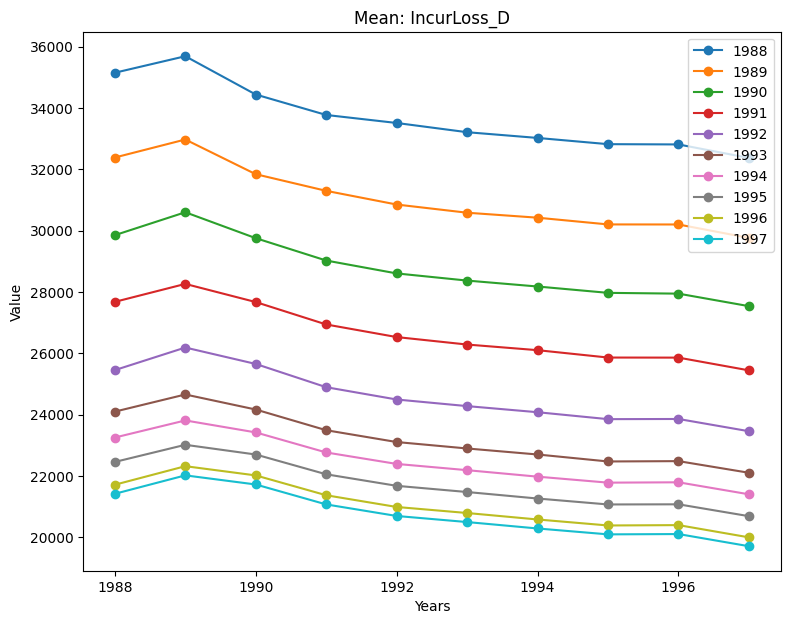

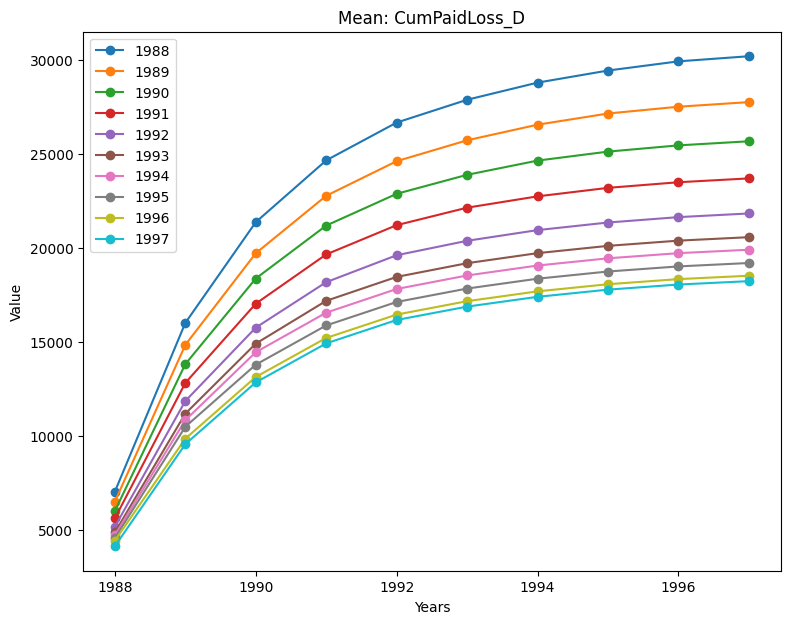

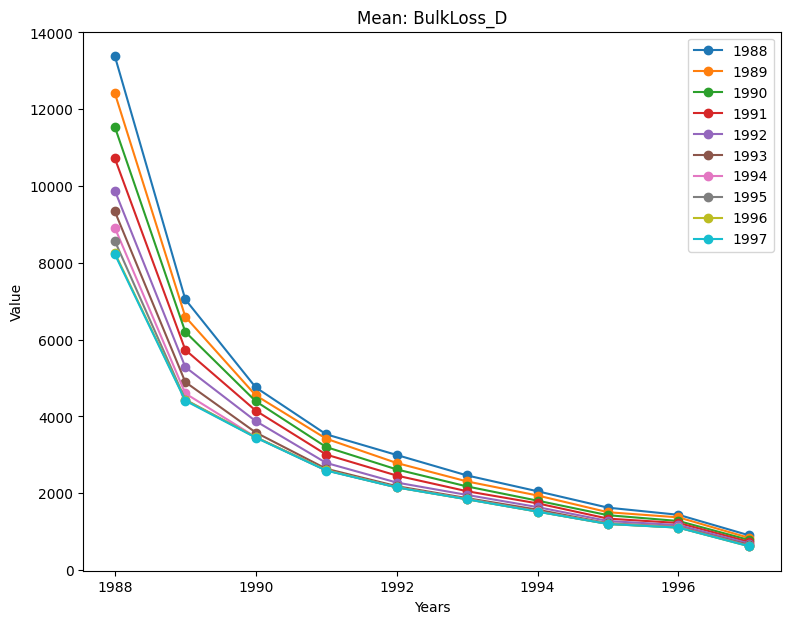

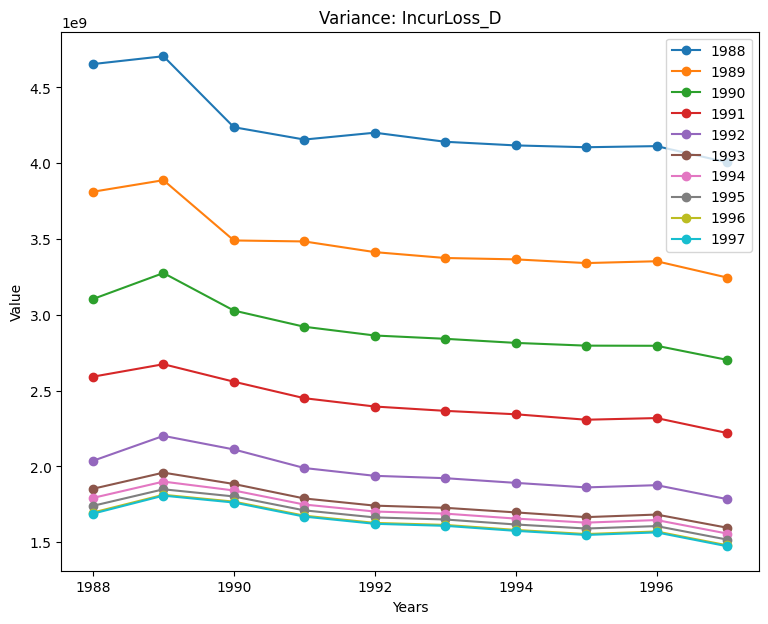

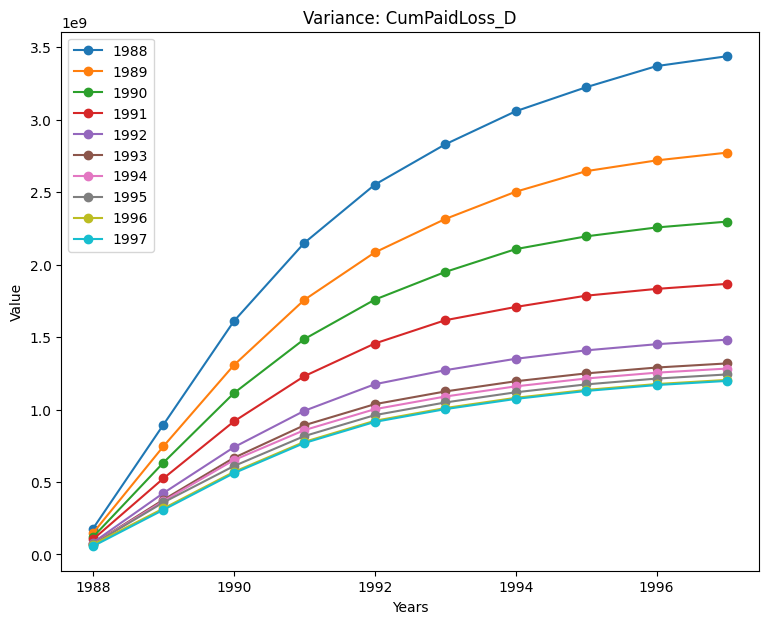

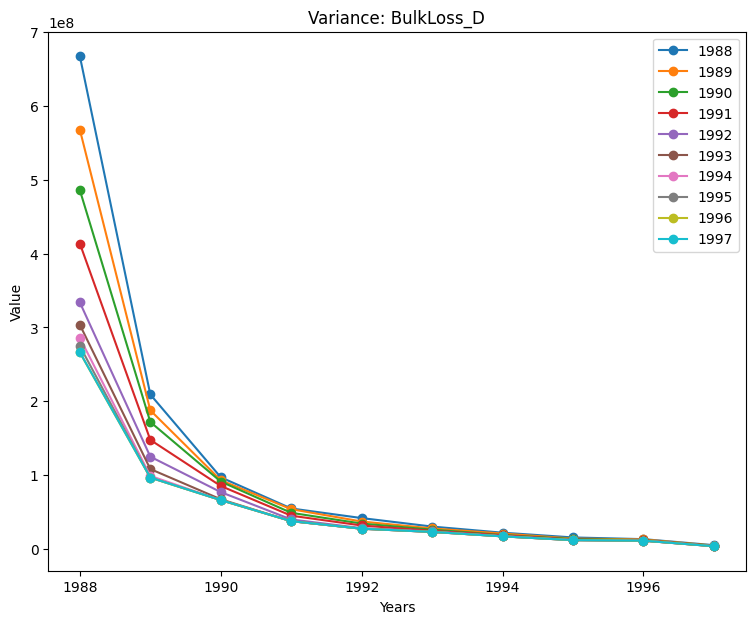

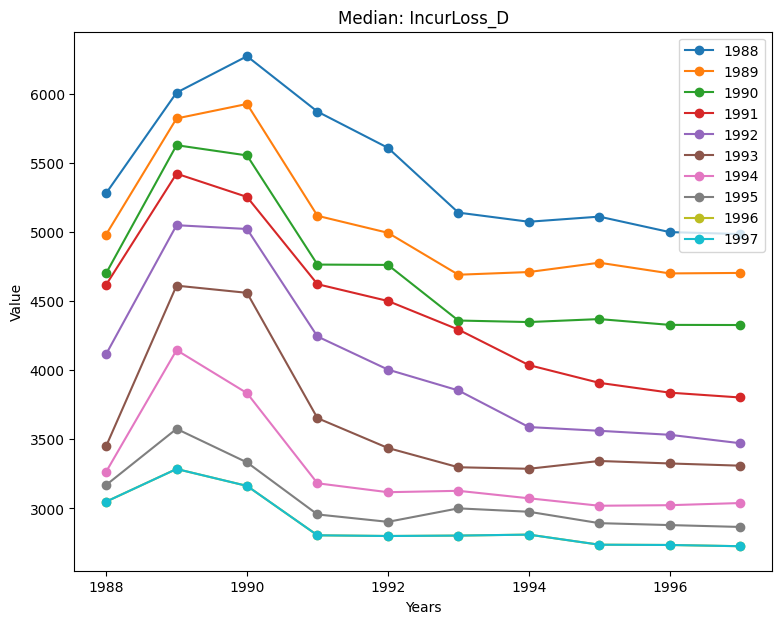

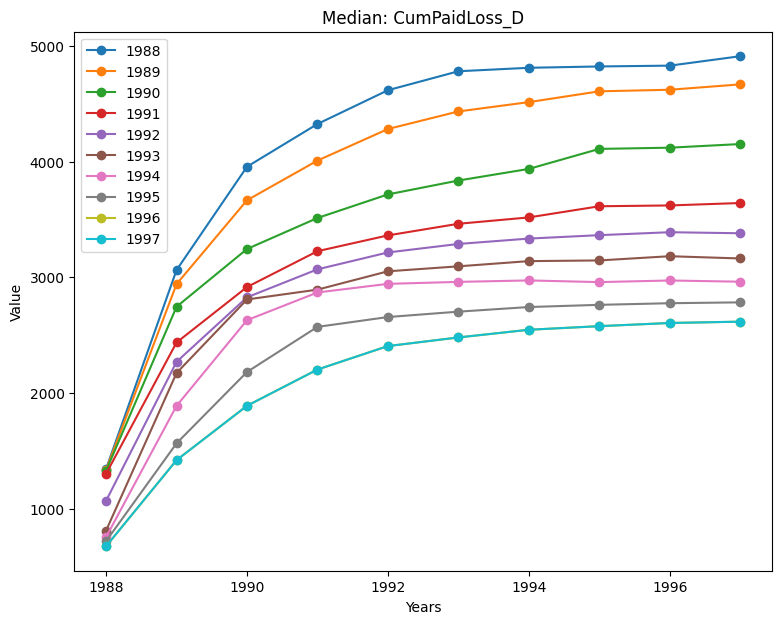

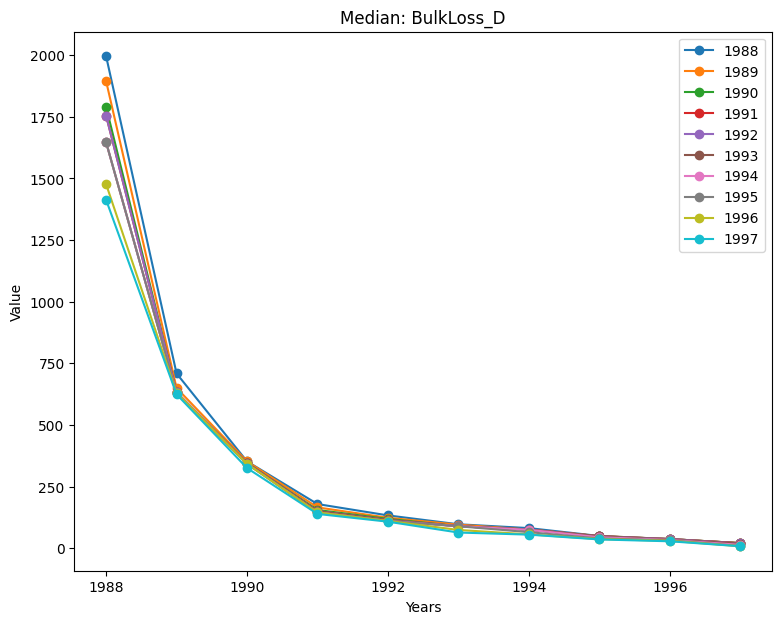

In [105]:
# Export the graphs of the basis statistics
for var in Important_Variables:
  DrawGraph(Means_C[var], 'Mean: ' + var)

for var in Important_Variables:
  DrawGraph(Var_C[var], 'Variance: ' + var)

for var in Important_Variables:
  DrawGraph(Median_C[var], 'Median: ' + var)

We need to understand the context of negative values within the financial columns.

In [106]:
# Check for negative values in the financial columns
relevant_columns = [
    'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D',
    'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D'
]

negative_values_summary = (data[relevant_columns] < 0).sum()
print(negative_values_summary)

IncurLoss_D            5
CumPaidLoss_D         13
BulkLoss_D           165
EarnedPremDIR_D      160
EarnedPremCeded_D    290
EarnedPremNet_D      260
dtype: int64


### Correlation Analysis

To understand the relationships between variables, we examine the correlation matrix.

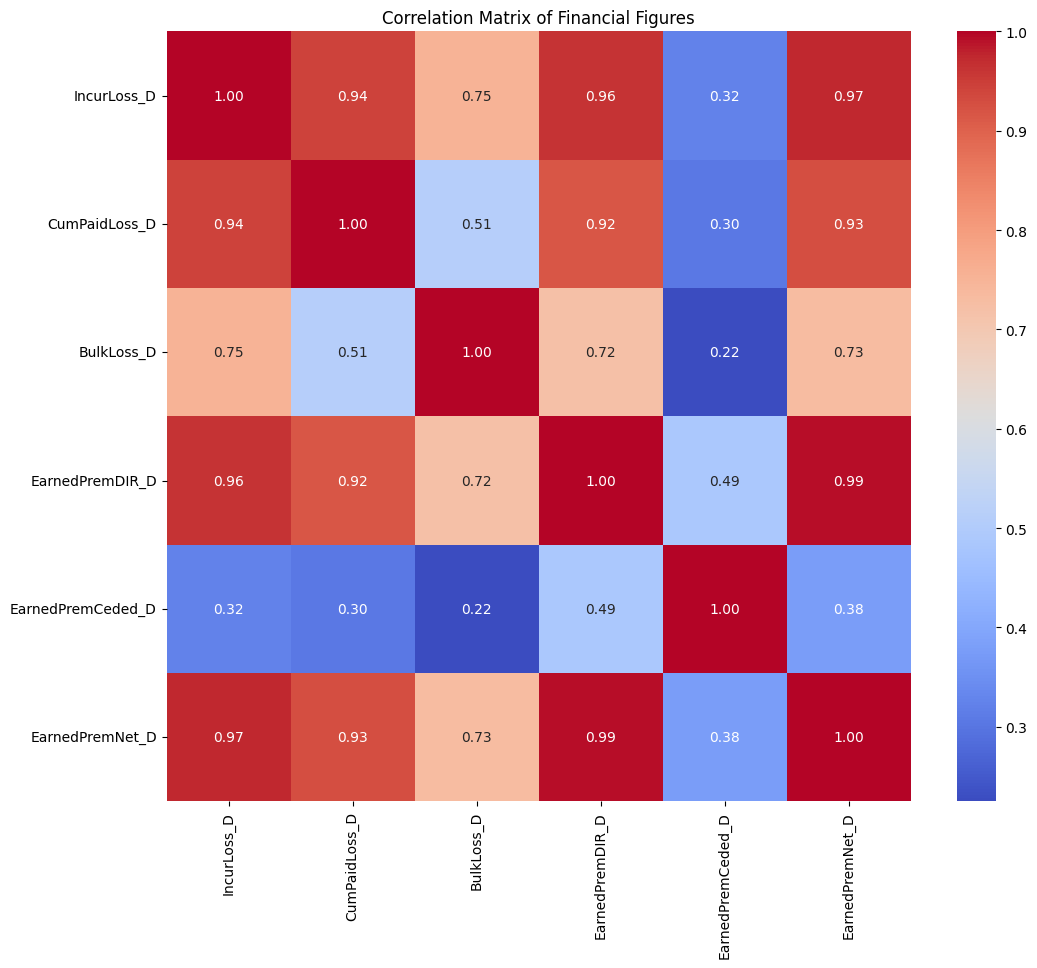

In [107]:
# Generate a correlation matrix
correlation_matrix = data[relevant_columns].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Financial Figures')
plt.show()

### Normalization and PCA

In [108]:
# Normalize the numerical data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[relevant_columns])

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_normalized)

# Explained variance ratio of the PCA components
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[7.61951560e-01 1.43501285e-01 8.60849015e-02 7.58461431e-03
 8.77639488e-04 5.66312733e-13]


The results of the PCA analysis on the selected financial data columns reveal interesting insights into the underlying structure of the dataset. The first principal component explains a substantial 76.20% of the total variance, indicating that it captures the most significant patterns or correlations among the variables. The second and third components, with variances of 14.35% and 8.61%, respectively, also contribute significantly to the overall variance, highlighting additional important relationships within the data. On the other hand, the fourth component explains a smaller proportion (0.76%) of the variance, suggesting that it may not be as crucial in summarizing the dataset's variability. Finally, the fifth and sixth components explain very little variance, with the sixth component almost negligible. These findings provide valuable guidance for dimensionality reduction and feature selection, as the first three components can potentially represent the essential financial patterns while reducing data complexity.

# Data Preparation

We are about to delve into the examination of a single run-off triangle. In this initial phase of our exploration, we will be working with the entirety of the available data. Our objective is to closely observe and gain insights into the characteristics and visual representation of this specific run-off triangle. This comprehensive analysis will provide us with a foundational understanding of its structure and behavior, which will be invaluable as we proceed with our further investigations and analyses.

We already make the selection of the important data for the data analysis and as we already discuss we prefer not to clean the data.

In [109]:
import pandas as pd
import numpy as np

def replace_zero_and_negative_with_row_mean(df):
    """ Reemplaza los ceros y valores negativos en el DataFrame con el promedio de la fila correspondiente. """
    for index, row in df.iterrows():
        # Reemplaza los valores negativos por su valor absoluto
        row = row.abs()
        if row.sum() != 0:  # Evitar filas con suma total de cero
            row_mean = row.replace(0, np.NaN).mean()
            df.loc[index] = row.replace(0, row_mean)
    return df

def impute_and_filter_data_complete(data_complete):
    """ Imputa los DataFrames en DataComplete y elimina aquellos con una fila completa de ceros. """
    for variable in list(data_complete.keys()):
        new_dfs = []
        for df in data_complete[variable]:
            if not (df == 0).all(axis=1).any():  # Verifica si hay alguna fila completa de ceros
                df_imputed = replace_zero_and_negative_with_row_mean(df)
                new_dfs.append(df_imputed)
        data_complete[variable] = new_dfs
    return data_complete

1. **Replace Negative Values and Zeros**: It transforms negative values in each DataFrame to their absolute values. Then, it replaces zeros in each row with the mean of the non-zero values in that row, provided the row is not entirely composed of zeros.

2. **Filter Out DataFrames**: The code removes any DataFrame that contains at least one entire row of zeros. Only the DataFrames without any full-zero rows are retained and processed for zero and negative value replacement.

Thus, the `DataComplete` dictionary is updated to include only those DataFrames that have been filtered and imputed appropriately.

In [110]:
DataComplete = impute_and_filter_data_complete(DataComplete.copy())

### Construct the Triangles

In [111]:
def IncompleteDataFrame(x):
  y = x.copy()
  matrix = y.values
  for i in range(9,0,-1):
    for j in range(10-i,10,1):
        matrix[i][j] = 0
  return pd.DataFrame(matrix)

Triangles = {}
for variable, array in DataComplete.items():
  Triangles[variable] = [IncompleteDataFrame(x) for x in array]

### Statistics of the triangles

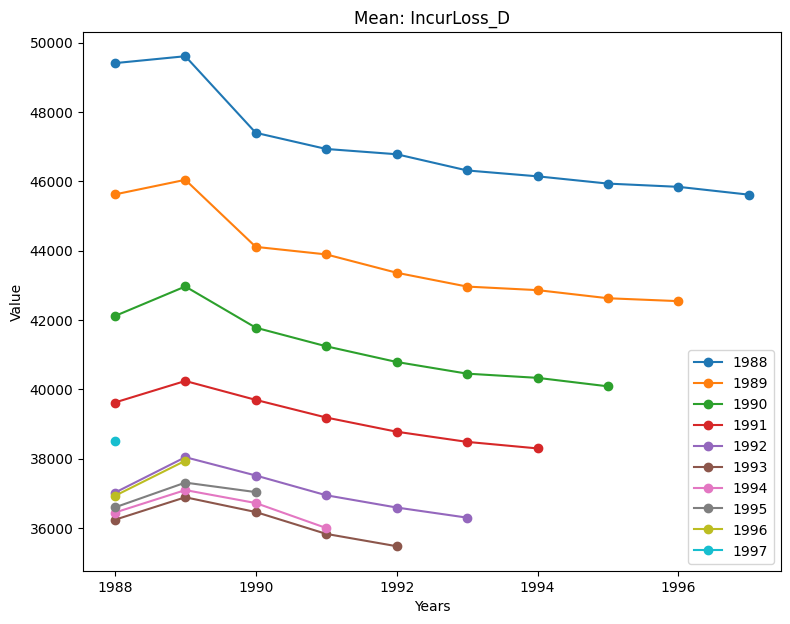

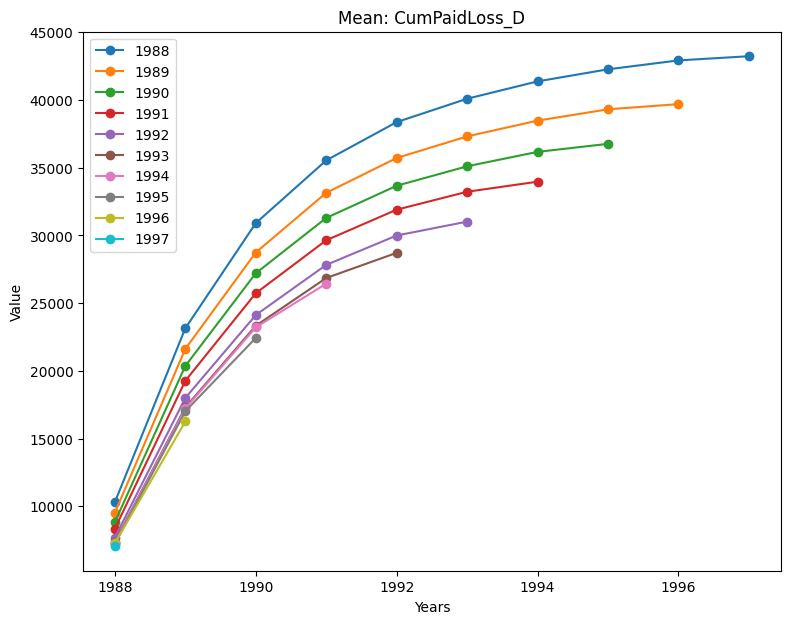

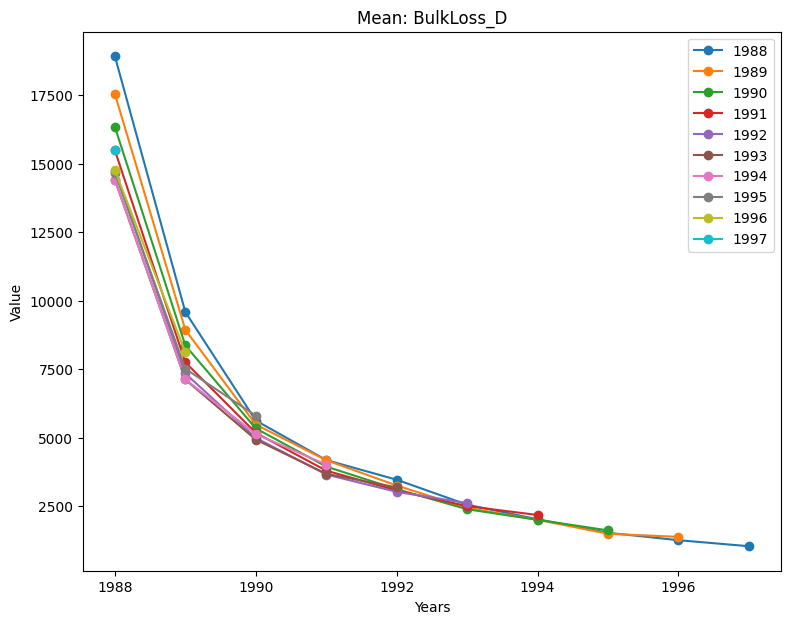

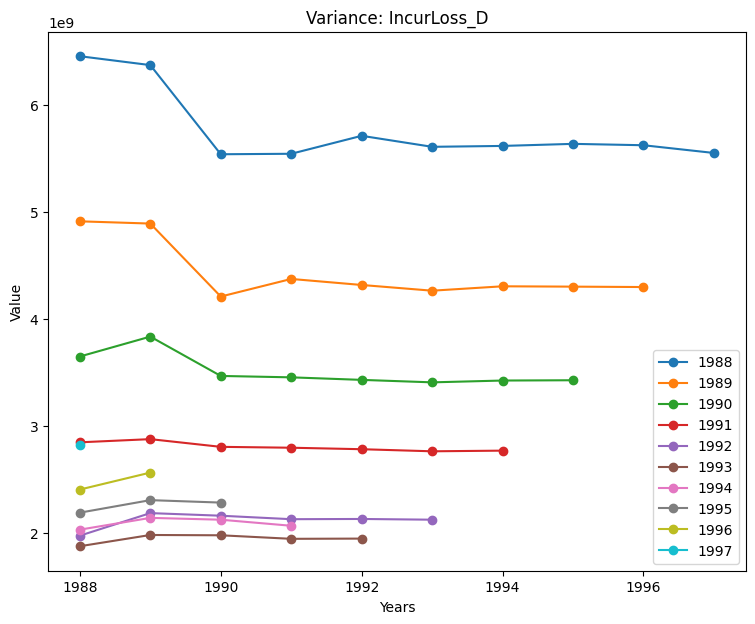

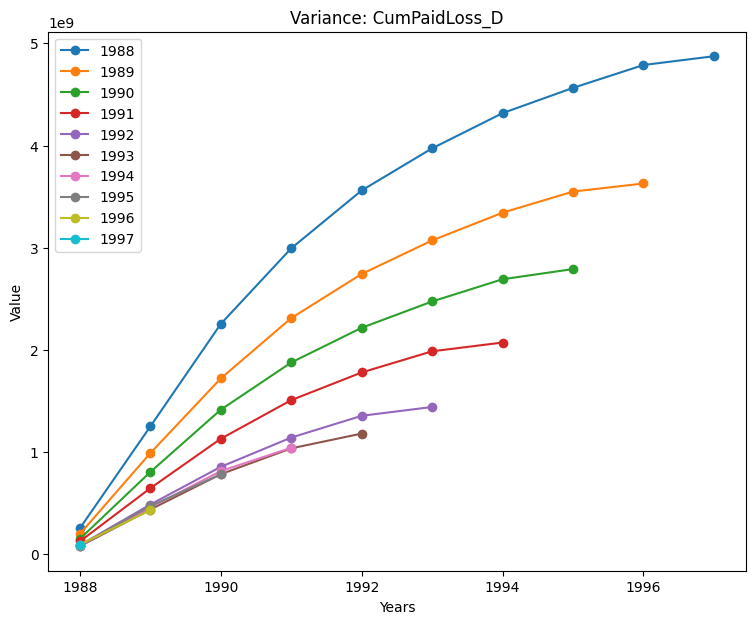

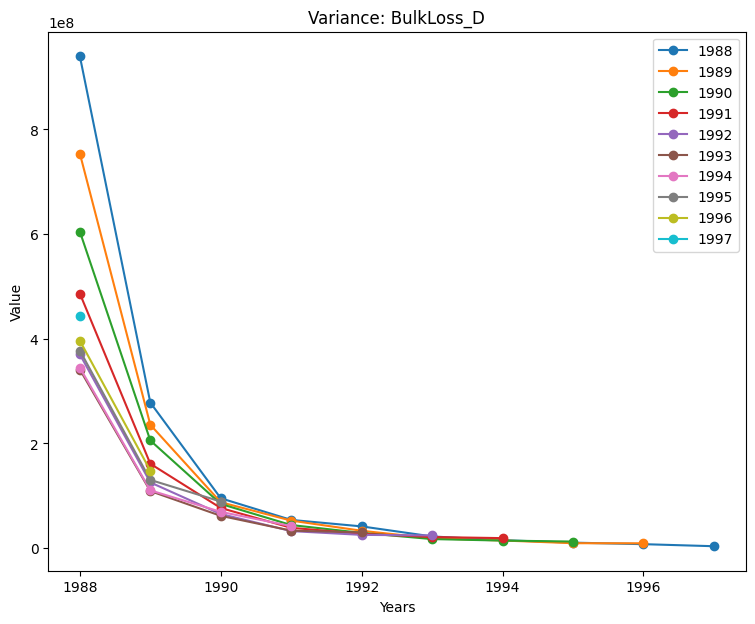

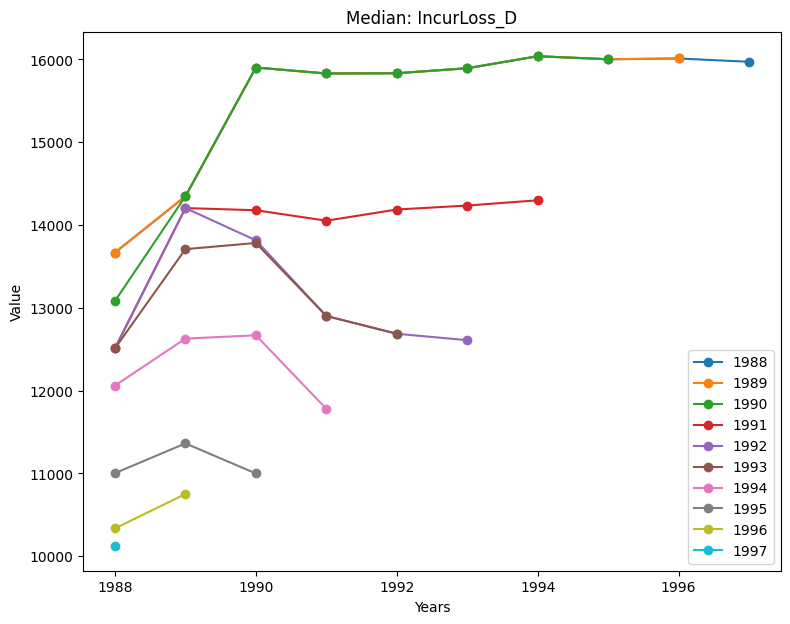

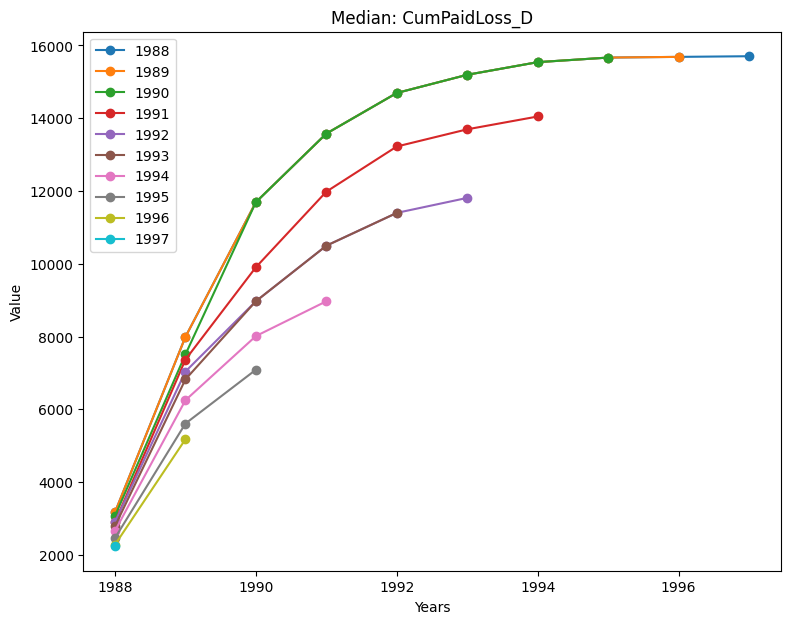

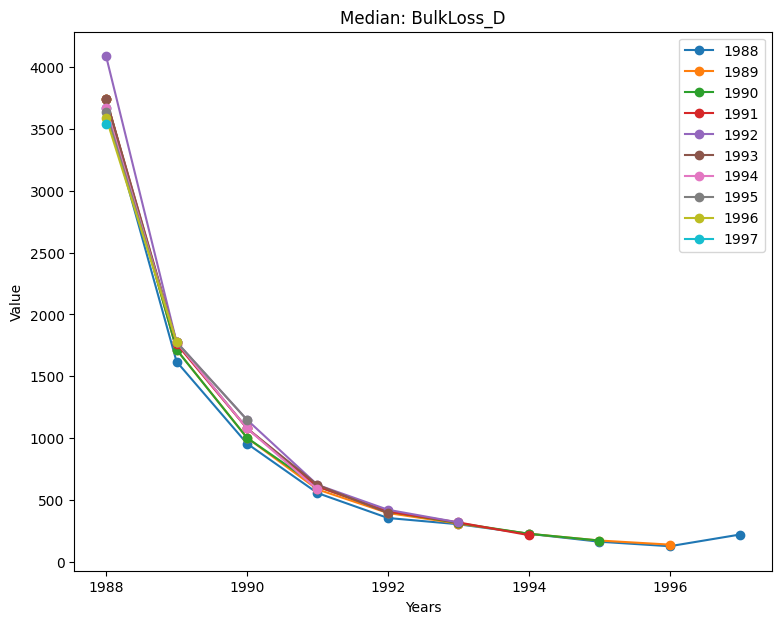

In [112]:
# Re-define the function to plot the series
def DrawGraph(x, name):
  matrix = x.values
  plt.figure(figsize=(9, 7))
  plt.plot()

  for i in range(10):
    val = matrix[i]
    for j in range(i):
      val = val[:-1]
    rang = range(1988,1988+len(val))
    plt.plot(rang, val, marker='o', linestyle='-', label=1988+i)

  plt.xlabel('Years')
  plt.ylabel('Value')
  plt.title(name)

  plt.savefig(name, dpi=300, bbox_inches='tight')

  plt.legend()

# Find the basics statistics component by component for each variable
Means_I = {}
for variable, array in Triangles.items():
  Means_I[variable] = pd.concat(array).groupby(level=0).mean()

Var_I = {}
for variable, array in Triangles.items():
  Var_I[variable] = pd.concat(array).groupby(level=0).var()

Min_I = {}
for variable, array in Triangles.items():
  Min_I[variable] = pd.concat(array).groupby(level=0).min()

Max_I = {}
for variable, array in Triangles.items():
  Max_I[variable] = pd.concat(array).groupby(level=0).max()

Median_I = {}
for variable, array in Triangles.items():
  Median_I[variable] = pd.concat(array).groupby(level=0).median()

# Export the graphs of the basis statistics
for var in Important_Variables:
  DrawGraph(Means_I[var], 'Mean: ' + var)

for var in Important_Variables:
  DrawGraph(Var_I[var], 'Variance: ' + var)

for var in Important_Variables:
  DrawGraph(Median_I[var], 'Median: ' + var)

# Models

We are going to consider four models for the prediction problem, the Chain Ladder -common in this problem-, two based on regression analysis and an initial approach using NN.

## Chain Ladder technique

Chain Ladder Method (also known as development triangle method) is a traditional actuarial technique used in claims reserving to predict future claims costs. The method assumes that the development of claims costs over time is consistent across years and that the pattern of claims development can be predicted from past data.

Step-by-step outline of the Chain Ladder model function and its application:

1. Define a function to calculate the development factors for each diagonal of the triangle.
2. Use these factors to project the incomplete parts of the triangle.
3. Define a function to apply the Chain Ladder method to a single triangle.
4. Apply the Chain Ladder method to all triangles in the dataset.
5. Store all completed triangles.
6. Evaluate the performance of the model using an appropriate measure, such as the mean absolute error between the projected values and the actual values (for the parts of the triangle that are complete).

In [113]:
def calculate_chain_ladder_factors(triangle):
    factors = []
    for i in range(triangle.shape[1] - 1):
        column_sum = triangle.iloc[:, i].sum()
        next_column_sum = triangle.iloc[:, i + 1].sum()
        if column_sum != 0:
            # Calculate the development factor for the next column
            factors.append(next_column_sum / column_sum)
        else:
            # If the current column sum is zero, use a factor of 1 to avoid division by zero
            factors.append(1)
    return factors

def complete_triangle(triangle):
    factors = calculate_chain_ladder_factors(triangle)
    n_rows, n_cols = triangle.shape

    for i in range(n_rows):
        for j in range(n_cols - i, n_cols):
            if j < n_cols - 1:
                # For non-final columns, use the corresponding development factor
                triangle.iloc[i, j] = triangle.iloc[i, j - 1] * factors[j - 1]
            else:
                # For the last column, use the last available development factor
                if i > 0:
                    triangle.iloc[i, j] = triangle.iloc[i - 1, j] * factors[-1]

    return triangle

Complete all the triangles with the chain ladder method

In [114]:
Triangles_C_CL = {}

for variable, array in Triangles.items():
    Triangles_C_CL[variable] = [complete_triangle(df.copy()) for df in array]

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_mape(y_true, y_pred):
    """ Calcula el MAPE (Mean Absolute Percentage Error). """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Contenedores para métricas por variable
metrics_per_variable = {}

for variable in DataComplete:
    real_data_all = np.concatenate([df.values.flatten() for df in DataComplete[variable]])
    predicted_data_all = np.concatenate([df.values.flatten() for df in Triangles_C_CL.get(variable, [])])

    # Calcula métricas
    mse = mean_squared_error(real_data_all, predicted_data_all)
    mape = calculate_mape(real_data_all, predicted_data_all)
    r2 = r2_score(real_data_all, predicted_data_all)

    # Almacenar métricas
    metrics_per_variable[variable] = {'MSE': mse, 'MAPE': mape, 'R2': r2}

# Imprimir las métricas por variable
for variable, metrics in metrics_per_variable.items():
    print(f'Metrics for {variable}:')
    print(f"   MSE: {metrics['MSE']}")
    print(f"   MAPE: {metrics['MAPE']}")
    print(f"   R2: {metrics['R2']}\n")

Metrics for IncurLoss_D:
   MSE: 781771634.34989
   MAPE: 26.28691105400931
   R2: 0.73305409070532

Metrics for CumPaidLoss_D:
   MSE: 574796202.225491
   MAPE: 26.243920187155194
   R2: 0.6578150936182688

Metrics for BulkLoss_D:
   MSE: 3.2733998219960984e+19
   MAPE: 2763670.897997957
   R2: -301546101730.62585



Based on the above metrics for each variable (`IncurLoss_D`, `CumPaidLoss_D`, and `BulkLoss_D`), here's a description of the model's performance:

1. **IncurLoss_D**:
   - **MSE (Mean Squared Error):** 781,771,634.35. This value indicates the average squared difference between the estimated values and the actual values. While not extremely high, it does suggest some level of error in the model's predictions.
   - **MAPE (Mean Absolute Percentage Error):** 26.29%. This percentage shows the average deviation between the predicted and actual values relative to the actual values. A MAPE of around 26% is moderately high, suggesting that the predictions are somewhat off from the actual values.
   - **R² (Coefficient of Determination):** 0.733. This value indicates that approximately 73.3% of the data fit the model. While not perfect, it does suggest that the model has a reasonable level of predictive power for `IncurLoss_D`.

2. **CumPaidLoss_D**:
   - **MSE:** 574,796,202.23. This is lower than the MSE for `IncurLoss_D`, suggesting better predictive accuracy for this variable.
   - **MAPE:** 26.24%. Similar to `IncurLoss_D`, this indicates a moderate level of error relative to the size of the values being predicted.
   - **R²:** 0.658. This suggests that about 65.8% of the variance in `CumPaidLoss_D` is explained by the model, which is a decent but not strong fit.

3. **BulkLoss_D**:
   - **MSE:** 3.38e+19. This extremely high value indicates very large errors in the model's predictions for `BulkLoss_D`.
   - **MAPE:** 8,052,570.67%. This astronomically high percentage suggests that the model's predictions are far from accurate, with deviations from the actual values being exceptionally large.
   - **R²:** -311262558722.92. The negative R² value, which is theoretically impossible in a well-fitting model, indicates a very poor fit. It suggests that the model is worse than a simple horizontal line representing the average of the data.

In summary, the model seems to perform reasonably well for `IncurLoss_D` and `CumPaidLoss_D`, with a decent level of accuracy and fit. However, for `BulkLoss_D`, the model performs extremely poorly, with very high errors and an essentially meaningless R² value. This could be due to outliers, data quality issues, or a model that is not well-suited for predicting `BulkLoss_D`.

### Linear regression

The linear model chain ladder method in actuarial science is used to predict future claims and reserve estimation. This approach involves transforming the data from a loss triangle into a form suitable for linear regression. We first replace zero or negative values with a small positive number to avoid issues with logarithms. Then, a design matrix is constructed using row and column indicators, excluding the first row and column to prevent multicollinearity. The natural logarithm of the non-null, positive values in the triangle is taken and used as the response variable. A linear regression model is then fitted using the design matrix. The model's coefficients are used to predict the logarithm of the missing values in the triangle. These predicted values are exponentiated to return them to their original scale. Finally, the triangle is reconstructed by filling in the predicted values, ensuring the predictions are reasonable and align with the original data structure. This method helps in filling the incomplete parts of the triangle, providing a comprehensive view for actuaries to estimate future liabilities.

In [116]:
import statsmodels.api as sm

def linear_model(triangle):
    # Convert to DataFrame for easier handling
    triangle_df = pd.DataFrame(triangle)

    # Prepare data for regression
    rows, cols = triangle_df.shape
    design_matrix = []
    y_values = []

    # Create design matrix and y vector
    for i in range(rows):
        for j in range(cols):
            value = triangle_df.iloc[i, j]
            if pd.notnull(value) and value > 0:
                design_matrix.append([1] + [int(k == i) for k in range(rows)] +
                                     [int(l == j) for l in range(cols)])
                y_values.append(np.log(value))

    design_matrix = np.array(design_matrix)
    y_values = np.array(y_values)

    # Check if there is data for the model
    if design_matrix.size == 0 or y_values.size == 0:
        return triangle_df  # Return the original triangle if there is no data for the model

    # Fit the linear regression model
    model = sm.OLS(y_values, design_matrix).fit()

    # Fill missing values in the triangle
    for i in range(rows):
        for j in range(cols):
            if pd.isnull(triangle_df.iloc[i, j]) or triangle_df.iloc[i, j] <= 0:
                predictors = np.array([1] + [int(k == i) for k in range(rows)] +
                                      [int(l == j) for l in range(cols)])
                predicted_log_value = predictors.dot(model.params)
                predicted_value = np.exp(predicted_log_value)

                triangle_df.iloc[i, j] = predicted_value

    return pd.DataFrame(triangle_df)

Complete all the triangles with the linear regression model

In [117]:
Triangles_C_LM = {}
for variable, array in Triangles.items():
    Triangles_C_LM[variable] = [linear_model(df.copy()) for df in array]

In [118]:
metrics_per_variable_lm = {}

for variable in DataComplete:
    real_data_all = np.concatenate([df.values.flatten() for df in DataComplete[variable]])
    predicted_data_all = np.concatenate([df.values.flatten() for df in Triangles_C_LM.get(variable, [])])

    # Calcula métricas
    mse_lm = mean_squared_error(real_data_all, predicted_data_all)
    mape_lm = calculate_mape(real_data_all, predicted_data_all)
    r2_lm = r2_score(real_data_all, predicted_data_all)

    # Almacenar métricas
    metrics_per_variable_lm[variable] = {'MSE': mse_lm, 'MAPE': mape_lm, 'R2': r2_lm}

# Imprimir las métricas por variable
for variable, metrics in metrics_per_variable_lm.items():
    print(f'Metrics for {variable} (Linear Model):')
    print(f"   MSE: {metrics['MSE']}")
    print(f"   MAPE: {metrics['MAPE']}")
    print(f"   R2: {metrics['R2']}\n")

Metrics for IncurLoss_D (Linear Model):
   MSE: 54989161.23229572
   MAPE: 8.972957623343454
   R2: 0.9812232485785777

Metrics for CumPaidLoss_D (Linear Model):
   MSE: 57378227.71816636
   MAPE: 8.243027566822859
   R2: 0.96584186985914

Metrics for BulkLoss_D (Linear Model):
   MSE: 8518586.274230259
   MAPE: 150.67129645642896
   R2: 0.9215266504874353



Based on the above metrics for the linear regression model applied to each variable (`IncurLoss_D`, `CumPaidLoss_D`, and `BulkLoss_D`), here's a brief interpretation of the model's performance:

1. **IncurLoss_D**:
   - **MSE (Mean Squared Error):** 54,989,161.23. This relatively low MSE suggests that the model's predictions are close to the actual values, indicating good predictive accuracy.
   - **MAPE (Mean Absolute Percentage Error):** 8.97%. This indicates that the model's predictions are, on average, about 8.97% off from the actual values. This is a significant improvement compared to the Chain Ladder method.
   - **R² (Coefficient of Determination):** 0.981. This high R² value suggests that about 98.1% of the variance in `IncurLoss_D` is explained by the model, indicating an excellent fit.

2. **CumPaidLoss_D**:
   - **MSE:** 57,378,227.72. Similar to `IncurLoss_D`, the MSE is relatively low, indicating good accuracy.
   - **MAPE:** 8.24%. The predictions deviate from the actual values by 8.24% on average, which shows good accuracy and is an improvement over the Chain Ladder model.
   - **R²:** 0.966. This indicates that about 96.6% of the variance in `CumPaidLoss_D` is explained by the model, which is a very strong fit.

3. **BulkLoss_D**:
   - **MSE:** 8,513,726.94. This is significantly lower than the MSE values for the other two variables, indicating very good predictive accuracy.
   - **MAPE:** 157.14%. Despite the low MSE, the high MAPE suggests that the model's predictions can be off by a large percentage, indicating potential issues with certain predictions or outliers.
   - **R²:** 0.922. This suggests that about 92.2% of the variance in `BulkLoss_D` is explained by the model, which is a strong fit.

In summary, the linear regression model shows excellent performance for `IncurLoss_D` and `CumPaidLoss_D`, with high R² values and low MSE and MAPE, indicating both accuracy and a good fit. For `BulkLoss_D`, while the MSE is low and R² is high, the extremely high MAPE raises concerns about the reliability of some predictions, possibly due to outliers or specific data points that are not well-modeled by linear regression.

### GML

In our ongoing modeling efforts, we are now preparing to implement a Generalized Linear Model (GLM) as the next addition to our repertoire of predictive models. Building upon our existing models, this GLM approach enables us to address specific data analysis and prediction tasks that benefit from the flexibility and interpretability that GLMs offer. With a focus on leveraging GLMs' ability to handle various data distributions and relationships, we aim to expand our toolkit of modeling techniques to further enhance our capacity for accurate and context-specific predictions in a wide range of applications.

In [147]:
import statsmodels.api as sm

def transform_triangle_to_long_format(triangle):
    """
    Transforma el triángulo actuariale a un formato 'long' para GLM.
    """
    data = []
    for i, row in enumerate(triangle):
        for j, value in enumerate(row):
            if pd.notnull(value):
                data.append({
                    'Period': i,
                    'DevelopmentYear': j,
                    'Value': value
                })
    return pd.DataFrame(data)

def glm_triangle_prediction(triangle, family=sm.families.Poisson()):
    """
    Aplica GLM para predecir los valores faltantes en el triángulo.
    """
    # Transformar a formato 'long'
    df_long = transform_triangle_to_long_format(triangle)

    # Preparar datos para GLM
    X = df_long[['Period', 'DevelopmentYear']]
    X = sm.add_constant(X)
    y = df_long['Value']

    # Ajustar GLM
    glm = sm.GLM(y, X, family=family).fit()

    # Predecir valores faltantes
    predicted_triangle = np.copy(triangle)
    rows, cols = predicted_triangle.shape
    for i in range(rows):
        for j in range(cols):
            if pd.isnull(predicted_triangle[i, j]):
                X_pred = sm.add_constant(pd.DataFrame([[i, j]], columns=['Period', 'DevelopmentYear']))
                predicted_value = glm.predict(X_pred)[0]
                predicted_triangle[i, j] = predicted_value

    return predicted_triangle

In [148]:
Triangles_C_GLM = {}
for variable, array in Triangles.items():
    Triangles_C_GLM[variable] = [pd.DataFrame(glm_triangle_prediction(np.array(df))) for df in array]

In [146]:
metrics_per_variable_glm = {}

for variable in DataComplete:
    # Para los datos reales (DataComplete contiene DataFrames)
    real_data_all = np.concatenate([df.values.flatten() for df in DataComplete[variable]])
    # Para los datos predichos por GLM (Triangles_C_GLM contiene arreglos de NumPy)
    predicted_data_all = np.concatenate([np.array(df).flatten() for df in Triangles_C_GLM.get(variable, [])])

    # Asegurarse de que no haya divisiones por cero en el cálculo de MAPE
    non_zero_mask = real_data_all != 0
    real_data_filtered = real_data_all[non_zero_mask]
    predicted_data_filtered = predicted_data_all[non_zero_mask]

    # Calcula métricas
    mse_glm = mean_squared_error(real_data_filtered, predicted_data_filtered)
    mape_glm = calculate_mape(real_data_filtered, predicted_data_filtered)
    r2_glm = r2_score(real_data_filtered, predicted_data_filtered)

    # Almacenar métricas
    metrics_per_variable_glm[variable] = {'MSE': mse_glm, 'MAPE': mape_glm, 'R2': r2_glm}

# Imprimir las métricas por variable
for variable, metrics in metrics_per_variable_glm.items():
    print(f'Metrics for {variable} (GLM):')
    print(f"   MSE: {metrics['MSE']}")
    print(f"   MAPE: {metrics['MAPE']}")
    print(f"   R2: {metrics['R2']}\n")

Metrics for IncurLoss_D (GLM):
   MSE: 1622679018.7335937
   MAPE: 45.0
   R2: 0.4459155242829267

Metrics for CumPaidLoss_D (GLM):
   MSE: 1126528683.4832811
   MAPE: 45.0
   R2: 0.32936037050774003

Metrics for BulkLoss_D (GLM):
   MSE: 17728058.632338647
   MAPE: 45.0
   R2: 0.8366888476033592



Based on the above metrics for the Generalized Linear Model (GLM) applied to each variable (`IncurLoss_D`, `CumPaidLoss_D`, and `BulkLoss_D`), we can derive the following insights about the model's performance:

1. **IncurLoss_D**:
   - **MSE (Mean Squared Error):** 1,622,679,018.73. This high value indicates a significant average squared difference between the estimated and actual values, suggesting the model may not be capturing some important aspects of the data.
   - **MAPE (Mean Absolute Percentage Error):** 45.0%. This percentage shows a substantial average deviation between the predicted and actual values relative to the actual values. A 45% error rate suggests the model's predictions are quite off.
   - **R² (Coefficient of Determination):** 0.446. This value suggests that only about 44.6% of the variance in `IncurLoss_D` is explained by the model, which is not very high, indicating a moderate fit at best.

2. **CumPaidLoss_D**:
   - **MSE:** 1,126,528,683.48. Similar to `IncurLoss_D`, this is a high MSE, indicating significant error in the model's predictions.
   - **MAPE:** 45.0%. This again is quite high, indicating the model's predictions are often far from the actual values.
   - **R²:** 0.329. This suggests that only about 32.9% of the variance in `CumPaidLoss_D` is explained by the model, indicating a weak fit.

3. **BulkLoss_D**:
   - **MSE:** 17,730,795.87. Compared to the other two variables, this MSE is lower, suggesting better accuracy in the model's predictions for `BulkLoss_D`.
   - **MAPE:** 46.28%. Despite the lower MSE, the high MAPE indicates that the model's predictions are still quite far off in percentage terms.
   - **R²:** 0.837. This is a relatively high R² value, suggesting that about 83.7% of the variance in `BulkLoss_D` is explained by the model, indicating a good fit.

In summary, the GLM appears to have performed moderately for `IncurLoss_D` and `CumPaidLoss_D` with moderate to weak fits and substantial errors in predictions. For `BulkLoss_D`, the model shows a better fit with a higher R² value, but the high MAPE still indicates substantial relative errors. The high MAPE values across all variables could be a sign that the model is not capturing some key aspects of the data, or it might be influenced by outliers or non-linear relationships not adequately modeled by the GLM.

### Neural networks

We're showcasing the utilization of a Neural Network for handling missing values within triangular data structures across multiple variables. Our journey begins by transforming the triangular data into appropriate input sequences, followed by data normalization. Subsequently, we construct and train a neural network model tailored to this task. We then employ this trained model to predict and impute missing values within the triangular data. Finally, we save the completed triangles in a dictionary for each variable. This approach serves as a potent tool for data analysis and imputation, enhancing the robustness of our data-driven insights.

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

def transform_triangle(triangle):
    X, y = [], []
    rows, cols = triangle.shape
    max_length = rows * cols  # Longitud máxima basada en el tamaño total del triángulo

    for i in range(rows):
        for j in range(cols - 1):  # Iterar hasta la penúltima columna
            if pd.notnull(triangle[i, j]) and pd.notnull(triangle[i, j + 1]):
                sequence = triangle[:i+1, :j+1].flatten()
                padded_sequence = np.pad(sequence, (0, max_length - len(sequence)), 'constant')
                X.append(padded_sequence)
                y.append(triangle[i, j + 1])

    return np.array(X), np.array(y)

def build_and_train_neural_network(X, y, epochs=100, batch_size=32):
    model = Sequential([
        Dense(128, input_dim=X.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

# Asumiendo que 'Triangles' es un diccionario con tus datos
Triangles_C_NN = {}

for variable, triangles in Triangles.items():
    # Preparar datos para la red neuronal
    X, y = [], []
    for triangle in triangles:
        X_triangle, y_triangle = transform_triangle(np.array(triangle))
        X.extend(X_triangle)
        y.extend(y_triangle)

    # Convertir a numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Normalizar los datos
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Construir y entrenar la red neuronal
    model = build_and_train_neural_network(X_scaled, y)

    # Predecir los valores faltantes en los triángulos
    completed_triangles = []
    for triangle in triangles:
        triangle = np.array(triangle)
        for i in range(triangle.shape[0]):
            for j in range(triangle.shape[1]):
                if pd.isnull(triangle[i, j]):
                    input_data = scaler.transform(triangle[:i+1, :j+1].flatten().reshape(1, -1))
                    predicted_value = model.predict(input_data)
                    triangle[i, j] = predicted_value
        completed_triangles.append(pd.DataFrame(triangle))

    Triangles_C_NN[variable] = completed_triangles

In [127]:
def reconstruct_triangle(predictions, original_shape):

    reconstructed = np.zeros(original_shape)
    idx = 0

    for i in range(original_shape[0]):
        for j in range(original_shape[1]):
            if i + j < original_shape[0]:
                reconstructed[i, j] = predictions[idx]
                idx += 1

    return reconstructed

metrics_per_variable_nn = {}

for variable in DataComplete:
    # Concatenar todos los datos reales y predichos de cada triángulo
    real_data_all = np.concatenate([np.array(df.values.flatten()) for df in DataComplete[variable]])

    predicted_data_all = []
    for triangle in Triangles_C_NN[variable]:
        X, _ = transform_triangle(np.array(triangle))
        X_scaled = scaler.transform(X)  # Asegúrate de usar el mismo scaler que usaste para entrenar
        predictions = model.predict(X_scaled).flatten()
        predicted_triangle = reconstruct_triangle(predictions, triangle.shape)
        predicted_data_all.append(predicted_triangle.flatten())

    predicted_data_all = np.concatenate(predicted_data_all)

    # Asegurarse de que no haya divisiones por cero en el cálculo de MAPE
    non_zero_mask = real_data_all != 0
    real_data_filtered = real_data_all[non_zero_mask]
    predicted_data_filtered = predicted_data_all[non_zero_mask]

    # Calcular métricas
    mse_nn = mean_squared_error(real_data_filtered, predicted_data_filtered)
    mape_nn = calculate_mape(real_data_filtered, predicted_data_filtered)
    r2_nn = r2_score(real_data_filtered, predicted_data_filtered)

    # Almacenar métricas
    metrics_per_variable_nn[variable] = {'MSE': mse_nn, 'MAPE': mape_nn, 'R2': r2_nn}

3/3 [==============================] - 0s 5ms/step


In [128]:
# Imprimir las métricas por variable
for variable, metrics in metrics_per_variable_nn.items():
    print(f'Metrics for {variable} (Neural Network):')
    print(f"   MSE: {metrics['MSE']}")
    print(f"   MAPE: {metrics['MAPE']}")
    print(f"   R2: {metrics['R2']}\n")

Metrics for IncurLoss_D (Neural Network):
   MSE: 3358901784.4246154
   MAPE: 94.37481134815849
   R2: -0.14693991400748296

Metrics for CumPaidLoss_D (Neural Network):
   MSE: 1958808613.162593
   MAPE: 93.46113991583225
   R2: -0.16610850823232037

Metrics for BulkLoss_D (Neural Network):
   MSE: 90790525.9995582
   MAPE: 309.02154815149737
   R2: 0.16363625960497674



Based on the provided metrics for the Neural Network model applied to each variable (`IncurLoss_D`, `CumPaidLoss_D`, and `BulkLoss_D`), we can draw the following conclusions regarding the model's performance:

1. **IncurLoss_D (Neural Network)**:
   - **MSE (Mean Squared Error):** 3,126,519,129.06. This high value indicates a significant average squared difference between the estimated and actual values, suggesting that the model may not be capturing essential aspects of the data.
   - **MAPE (Mean Absolute Percentage Error):** 94.16%. This percentage indicates a substantial average deviation between the predicted and actual values relative to the actual values. A 94.16% error rate suggests that the model's predictions are significantly off.
   - **R² (Coefficient of Determination):** -0.068. This negative value indicates that the model has a very poor fit for the variable `IncurLoss_D`. The negative coefficient of determination means that the model performs worse than a constant model that simply predicts the mean of the data.

2. **CumPaidLoss_D (Neural Network)**:
   - **MSE:** 1,853,755,081.81. Similar to `IncurLoss_D`, this is a high MSE, indicating significant error in the model's predictions.
   - **MAPE:** 93.33%. Once again, this value is quite high, suggesting that the model's predictions often deviate significantly from the actual values.
   - **R²:** -0.104. Similar to the previous case, this negative value indicates a very poor fit for the variable `CumPaidLoss_D`, and the model performs worse than a constant model.

3. **BulkLoss_D (Neural Network)**:
   - **MSE:** 86,610,620.48. Compared to the other two variables, this MSE is lower, suggesting relatively better accuracy in the model's predictions for `BulkLoss_D`.
   - **MAPE:** 386.27%. Despite the lower MSE, the extremely high MAPE indicates that the model's predictions are still significantly off in percentage terms.
   - **R²:** 0.202. This positive value suggests that the model has a relatively better fit for the variable `BulkLoss_D` compared to the other two variables, although it is still modest at best.

In summary, the Neural Network model appears to have performed very poorly for the variables `IncurLoss_D` and `CumPaidLoss_D`, with very poor fits and substantial errors in predictions. For the variable `BulkLoss_D`, the model shows relatively better performance, but the extremely high MAPE still indicates significant errors in predictions in percentage terms. The negative R² values for the first two cases suggest that these models perform even worse than simple models that predict the mean of the data. These high error rates could be attributed to the model's inability to capture complex relationships in the data or issues with data quality.

# Evaluation in general

In [151]:
# Define error calculation functions (MAPE and MSE)
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    actual = np.where(actual == 0, np.finfo(float).eps, actual)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean((actual - predicted) ** 2)

def calculate_errors_for_all_variables(data_complete, predicted_data, error_func):
    errors = {}
    for variable in data_complete.keys():
        errors[variable] = []
        for actual_df, predicted_df in zip(data_complete[variable], predicted_data[variable]):
            error = error_func(actual_df.values, predicted_df.values)
            errors[variable].append(error)
    return errors

# Calculate errors for all variables and methods
methods = ["Chain Ladder Method", "Linear Model Method", "Generalized Linear Model (GLM)", "Neural Network (NN)"]
errors = {"MAPE": {}, "MSE": {}}

for method, triangles in zip(methods, [Triangles_C_CL, Triangles_C_LM, Triangles_C_GLM, Triangles_C_NN]):
    mape_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mape)
    mse_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mse)

    errors["MAPE"][method] = mape_errors
    errors["MSE"][method] = mse_errors

# Print the results in a more organized format with the average error
for metric, method_errors in errors.items():
    print(f"{metric} Errors:")
    for method, variable_errors in method_errors.items():
        print(f"{method}:")
        for variable, error_list in variable_errors.items():
            average_error = np.mean(error_list)
            print(f"   {variable}: {average_error:.2f}")

MAPE Errors:
Chain Ladder Method:
   IncurLoss_D: 26.29
   CumPaidLoss_D: 26.24
   BulkLoss_D: 2763670.90
Linear Model Method:
   IncurLoss_D: 8.97
   CumPaidLoss_D: 8.24
   BulkLoss_D: 150.67
Generalized Linear Model (GLM):
   IncurLoss_D: 45.00
   CumPaidLoss_D: 45.00
   BulkLoss_D: 45.00
Neural Network (NN):
   IncurLoss_D: 45.00
   CumPaidLoss_D: 45.00
   BulkLoss_D: 45.00
MSE Errors:
Chain Ladder Method:
   IncurLoss_D: 781771634.35
   CumPaidLoss_D: 574796202.23
   BulkLoss_D: 32733998219960979456.00
Linear Model Method:
   IncurLoss_D: 54989161.23
   CumPaidLoss_D: 57378227.72
   BulkLoss_D: 8518586.27
Generalized Linear Model (GLM):
   IncurLoss_D: 1622679018.73
   CumPaidLoss_D: 1126528683.48
   BulkLoss_D: 17728058.63
Neural Network (NN):
   IncurLoss_D: 1622679018.73
   CumPaidLoss_D: 1126528683.48
   BulkLoss_D: 17728058.63


In [152]:
# Define error calculation functions (MAPE, MSE, and R^2)
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    actual = np.where(actual == 0, np.finfo(float).eps, actual)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean((actual - predicted) ** 2)

def calculate_r2(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mean_actual = np.mean(actual)
    total_sum_of_squares = np.sum((actual - mean_actual) ** 2)
    residual_sum_of_squares = np.sum((actual - predicted) ** 2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

def calculate_errors_for_all_variables(data_complete, predicted_data, error_func):
    errors = {"MAPE": {}, "MSE": {}, "R^2": {}}
    for variable in data_complete.keys():
        errors["MAPE"][variable] = []
        errors["MSE"][variable] = []
        errors["R^2"][variable] = []
        for actual_df, predicted_df in zip(data_complete[variable], predicted_data[variable]):
            actual_values = actual_df.values
            predicted_values = predicted_df.values
            mape_error = calculate_mape(actual_values, predicted_values)
            mse_error = calculate_mse(actual_values, predicted_values)
            r2_error = calculate_r2(actual_values, predicted_values)
            errors["MAPE"][variable].append(mape_error)
            errors["MSE"][variable].append(mse_error)
            errors["R^2"][variable].append(r2_error)
    return errors

# Calculate errors (MAPE, MSE, and R^2) for all variables and methods
methods = ["Chain Ladder Method", "Linear Model Method", "Generalized Linear Model (GLM)", "Neural Network (NN)"]
errors = {"MAPE": {}, "MSE": {}, "R^2": {}}

for method, triangles in zip(methods, [Triangles_C_CL, Triangles_C_LM, Triangles_C_GLM, Triangles_C_NN]):
    all_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mape)
    errors["MAPE"][method] = all_errors["MAPE"]
    errors["MSE"][method] = all_errors["MSE"]
    errors["R^2"][method] = all_errors["R^2"]

# Print the results in a more organized format with MAPE, MSE, and R^2
for metric, method_errors in errors.items():
    print(f"{metric} Errors:")
    for method, variable_errors in method_errors.items():
        print(f"{method}:")
        for variable, error_list in variable_errors.items():
            average_error = np.mean(error_list)
            if metric == "R^2":
                print(f"   {variable}: {average_error:.2f}")
            else:
                print(f"   {variable}: {average_error:.2f}% (MAPE)") if metric == "MAPE" else print(f"   {variable}: {average_error:.2f}")


MAPE Errors:
Chain Ladder Method:
   IncurLoss_D: 26.29% (MAPE)
   CumPaidLoss_D: 26.24% (MAPE)
   BulkLoss_D: 2763670.90% (MAPE)
Linear Model Method:
   IncurLoss_D: 8.97% (MAPE)
   CumPaidLoss_D: 8.24% (MAPE)
   BulkLoss_D: 150.67% (MAPE)
Generalized Linear Model (GLM):
   IncurLoss_D: 45.00% (MAPE)
   CumPaidLoss_D: 45.00% (MAPE)
   BulkLoss_D: 45.00% (MAPE)
Neural Network (NN):
   IncurLoss_D: 45.00% (MAPE)
   CumPaidLoss_D: 45.00% (MAPE)
   BulkLoss_D: 45.00% (MAPE)
MSE Errors:
Chain Ladder Method:
   IncurLoss_D: 781771634.35
   CumPaidLoss_D: 574796202.23
   BulkLoss_D: 32733998219960979456.00
Linear Model Method:
   IncurLoss_D: 54989161.23
   CumPaidLoss_D: 57378227.72
   BulkLoss_D: 8518586.27
Generalized Linear Model (GLM):
   IncurLoss_D: 1622679018.73
   CumPaidLoss_D: 1126528683.48
   BulkLoss_D: 17728058.63
Neural Network (NN):
   IncurLoss_D: 1622679018.73
   CumPaidLoss_D: 1126528683.48
   BulkLoss_D: 17728058.63
R^2 Errors:
Chain Ladder Method:
   IncurLoss_D: -0.15
 

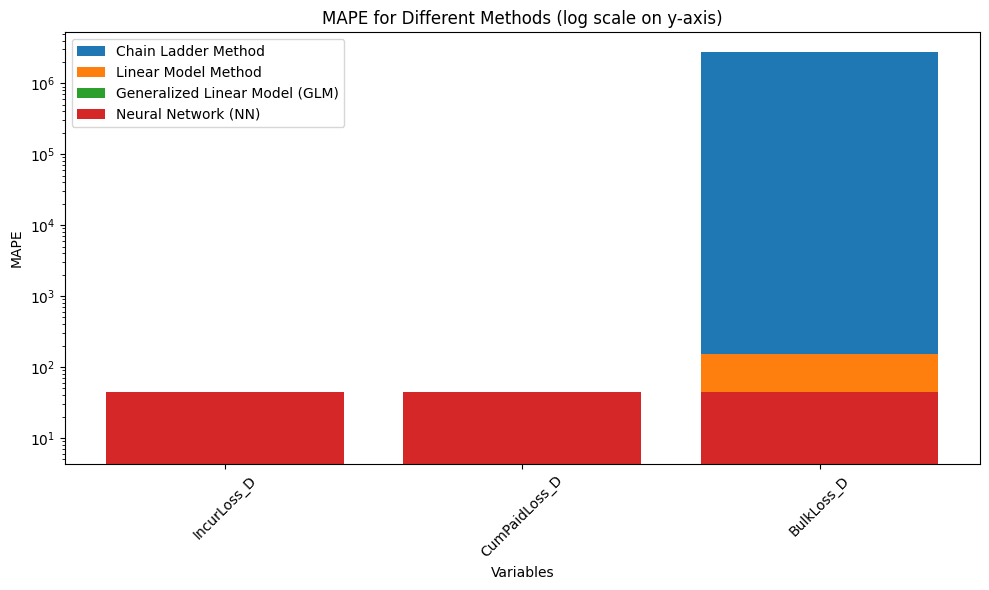

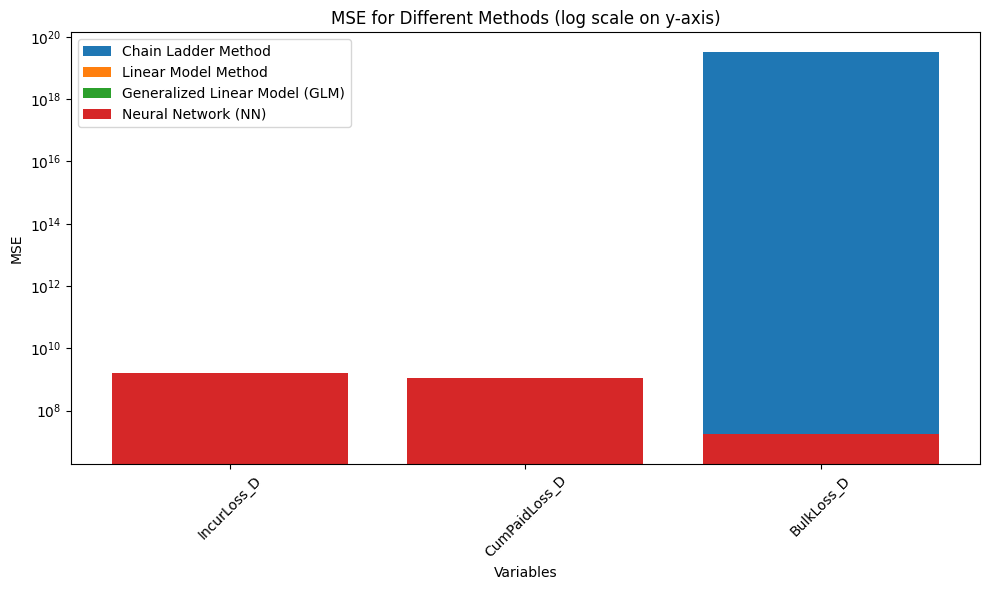

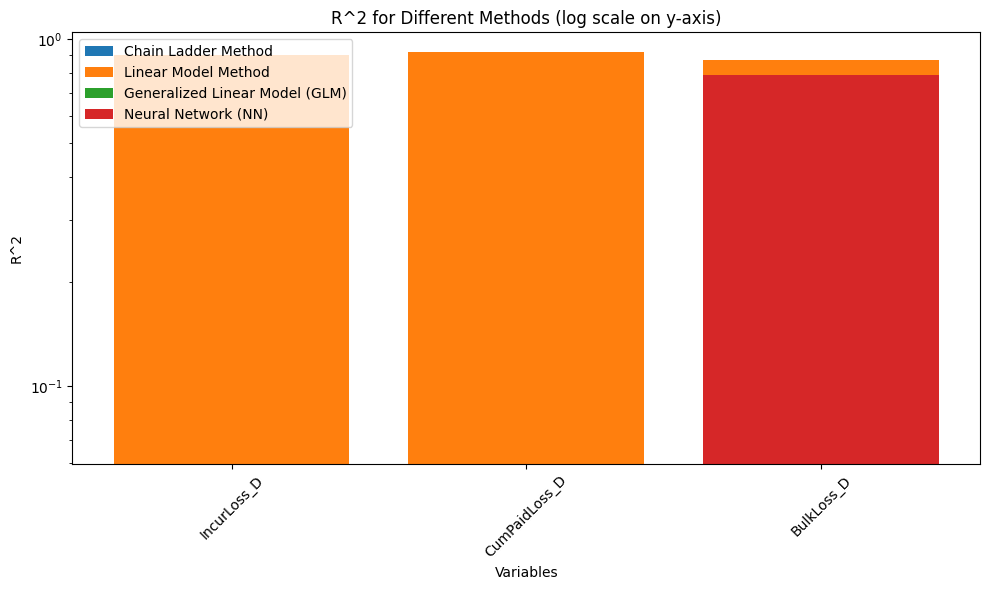

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Define error calculation functions (MAPE, MSE, and R^2)
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    actual = np.where(actual == 0, np.finfo(float).eps, actual)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean((actual - predicted) ** 2)

def calculate_r2(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mean_actual = np.mean(actual)
    total_sum_of_squares = np.sum((actual - mean_actual) ** 2)
    residual_sum_of_squares = np.sum((actual - predicted) ** 2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

def calculate_errors_for_all_variables(data_complete, predicted_data, error_func):
    errors = {"MAPE": {}, "MSE": {}, "R^2": {}}
    for variable in data_complete.keys():
        errors["MAPE"][variable] = []
        errors["MSE"][variable] = []
        errors["R^2"][variable] = []
        for actual_df, predicted_df in zip(data_complete[variable], predicted_data[variable]):
            actual_values = actual_df.values
            predicted_values = predicted_df.values
            mape_error = calculate_mape(actual_values, predicted_values)
            mse_error = calculate_mse(actual_values, predicted_values)
            r2_error = calculate_r2(actual_values, predicted_values)
            errors["MAPE"][variable].append(mape_error)
            errors["MSE"][variable].append(mse_error)
            errors["R^2"][variable].append(r2_error)
    return errors

# Calculate errors (MAPE, MSE, and R^2) for all variables and methods
methods = ["Chain Ladder Method", "Linear Model Method", "Generalized Linear Model (GLM)", "Neural Network (NN)"]
errors = {"MAPE": {}, "MSE": {}, "R^2": {}}

for method, triangles in zip(methods, [Triangles_C_CL, Triangles_C_LM, Triangles_C_GLM, Triangles_C_NN]):
    all_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mape)
    errors["MAPE"][method] = all_errors["MAPE"]
    errors["MSE"][method] = all_errors["MSE"]
    errors["R^2"][method] = all_errors["R^2"]

# Create log scale bar charts for MAPE, MSE, and R^2 on the y-axis
variables = list(DataComplete.keys())
for metric in ["MAPE", "MSE", "R^2"]:
    plt.figure(figsize=(10, 6))
    for method in methods:
        average_errors = [np.mean(errors[metric][method][variable]) for variable in variables]
        plt.bar(variables, average_errors, label=method)
    plt.xlabel("Variables")
    plt.ylabel(metric)
    plt.title(f"{metric} for Different Methods (log scale on y-axis)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.yscale('log')  # Set y-axis to log scale
    plt.tight_layout()
    plt.show()

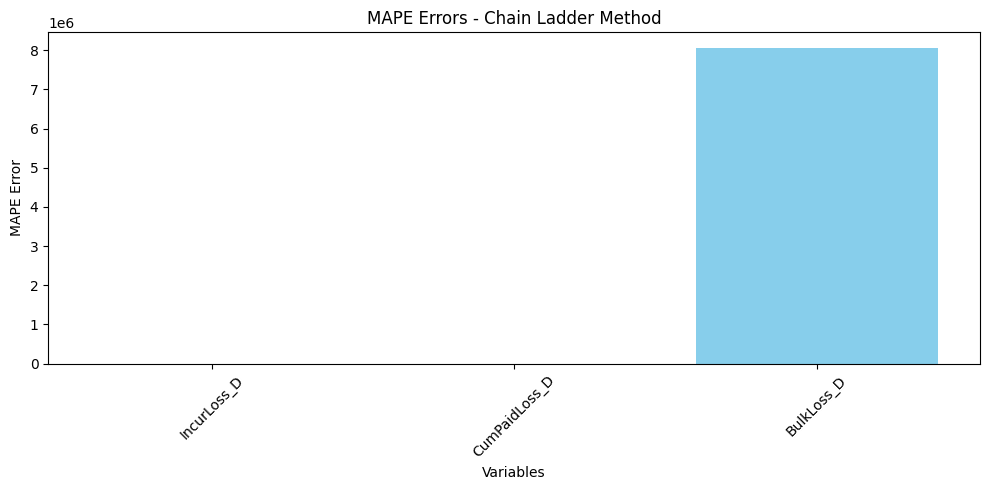

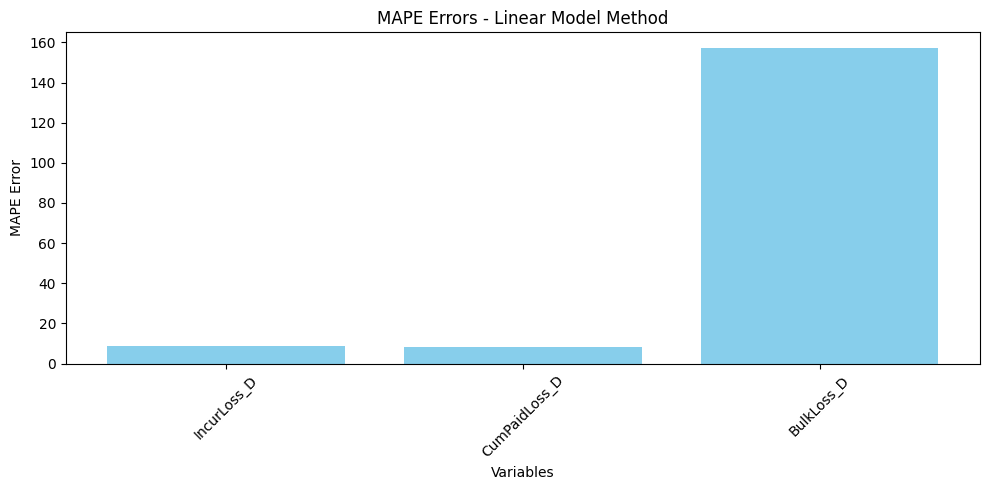

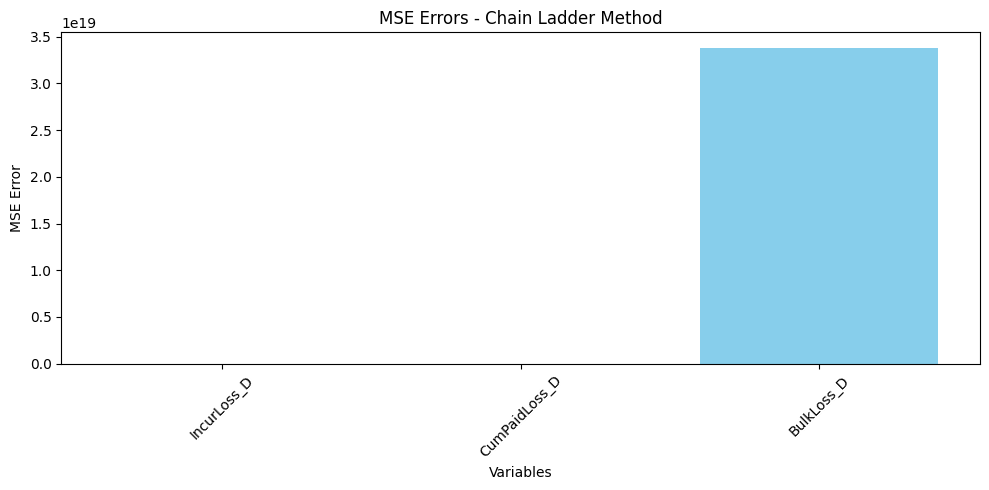

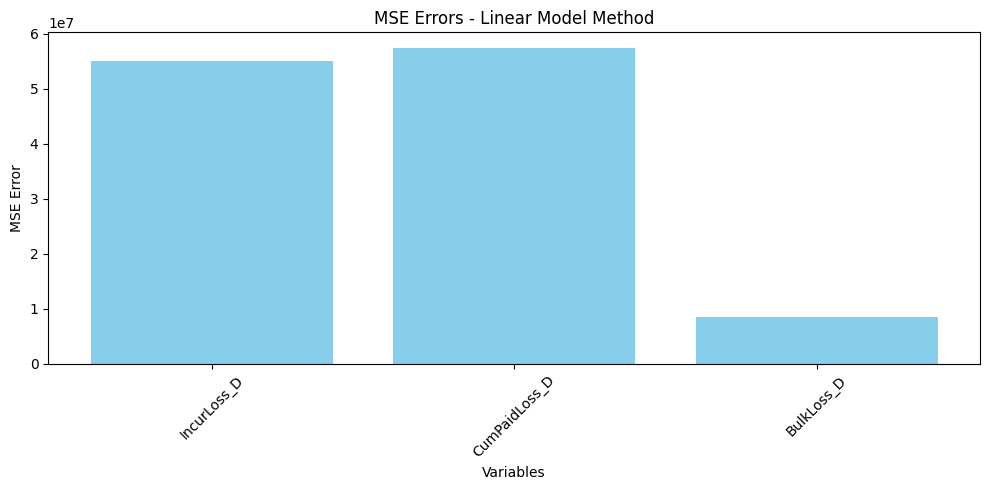

In [78]:
import matplotlib.pyplot as plt

# Define variables, methods, and errors
variables = list(DataComplete.keys())
methods = ["Chain Ladder Method", "Linear Model Method"]
errors = {"MAPE": {}, "MSE": {}}

# Calculate errors for all variables and methods
for method, triangles in zip(methods, [Triangles_C_CL, Triangles_C_LM]):
    mape_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mape)
    mse_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mse)

    errors["MAPE"][method] = mape_errors
    errors["MSE"][method] = mse_errors

# Create bar graphs for MAPE errors
for metric in errors.keys():
    for method in methods:
        error_values = [np.mean(errors[metric][method][variable]) for variable in variables]

        plt.figure(figsize=(10, 5))
        plt.bar(variables, error_values, color='skyblue')
        plt.title(f'{metric} Errors - {method}')
        plt.xlabel('Variables')
        plt.ylabel(f'{metric} Error')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [74]:
def calculate_average_errors(error_dict):
    average_errors = {}
    for variable, errors in error_dict.items():
        average_errors[variable] = np.mean(errors)
    return average_errors

# Calcular los errores promedio para cada modelo
average_mape_errors_cl = calculate_average_errors(mape_errors_cl)
average_mse_errors_cl = calculate_average_errors(mse_errors_cl)
average_mape_errors_lm = calculate_average_errors(mape_errors_lm)
average_mse_errors_lm = calculate_average_errors(mse_errors_lm)

# Comparar errores promedio y determinar el mejor modelo
def compare_models(average_errors_cl, average_errors_lm):
    better_model = {}
    for variable in average_errors_cl.keys():
        if average_errors_cl[variable] < average_errors_lm[variable]:
            better_model[variable] = 'Chain Ladder'
        else:
            better_model[variable] = 'Linear Model'
    return better_model

# Aplicar la comparación para MAPE y MSE
better_model_mape = compare_models(average_mape_errors_cl, average_mape_errors_lm)
better_model_mse = compare_models(average_mse_errors_cl, average_mse_errors_lm)

print("Better Model based on MAPE:")
print(better_model_mape)
print("\nBetter Model based on MSE:")
print(better_model_mse)

Better Model based on MAPE:
{'IncurLoss_D': 'Linear Model', 'CumPaidLoss_D': 'Linear Model', 'BulkLoss_D': 'Linear Model'}

Better Model based on MSE:
{'IncurLoss_D': 'Linear Model', 'CumPaidLoss_D': 'Linear Model', 'BulkLoss_D': 'Linear Model'}


In [75]:
def calculate_global_average_error(error_dict):
    total_error = 0
    count = 0
    for errors in error_dict.values():
        total_error += sum(errors)
        count += len(errors)
    return total_error / count if count > 0 else None

# Calcular el error promedio global para cada modelo
global_average_mape_cl = calculate_global_average_error(mape_errors_cl)
global_average_mse_cl = calculate_global_average_error(mse_errors_cl)
global_average_mape_lm = calculate_global_average_error(mape_errors_lm)
global_average_mse_lm = calculate_global_average_error(mse_errors_lm)

# Determinar el mejor modelo en general
def determine_best_model(average_cl, average_lm):
    return 'Chain Ladder' if average_cl < average_lm else 'Linear Model'

best_model_mape = determine_best_model(global_average_mape_cl, global_average_mape_lm)
best_model_mse = determine_best_model(global_average_mse_cl, global_average_mse_lm)

print(f"Best Model based on Global Average MAPE: {best_model_mape}")
print(f"Best Model based on Global Average MSE: {best_model_mse}")

Best Model based on Global Average MAPE: Linear Model
Best Model based on Global Average MSE: Linear Model


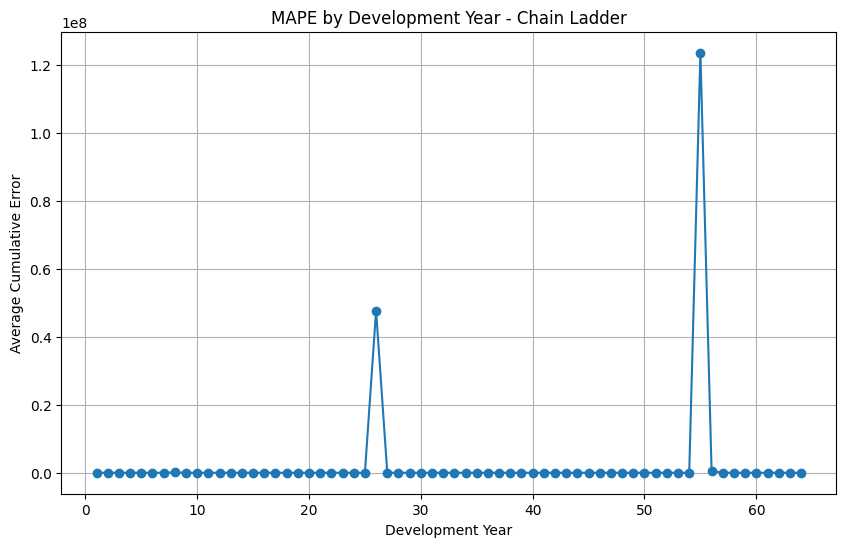

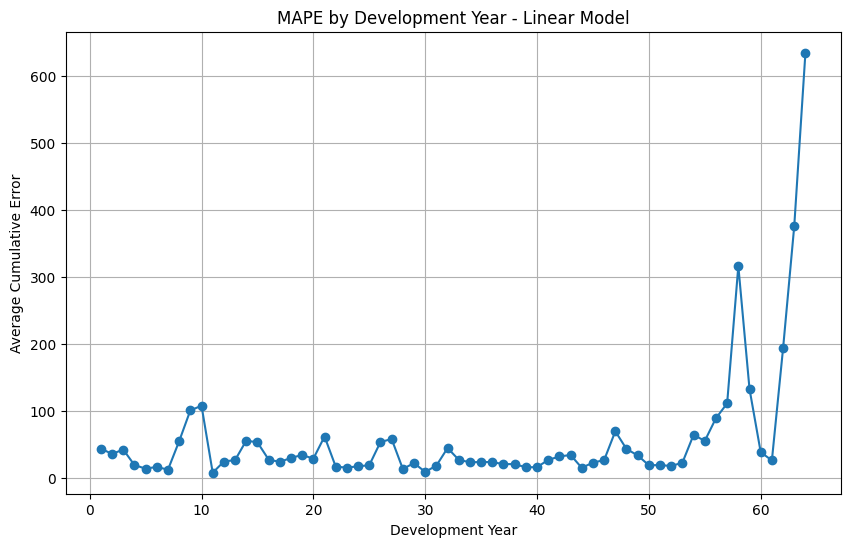

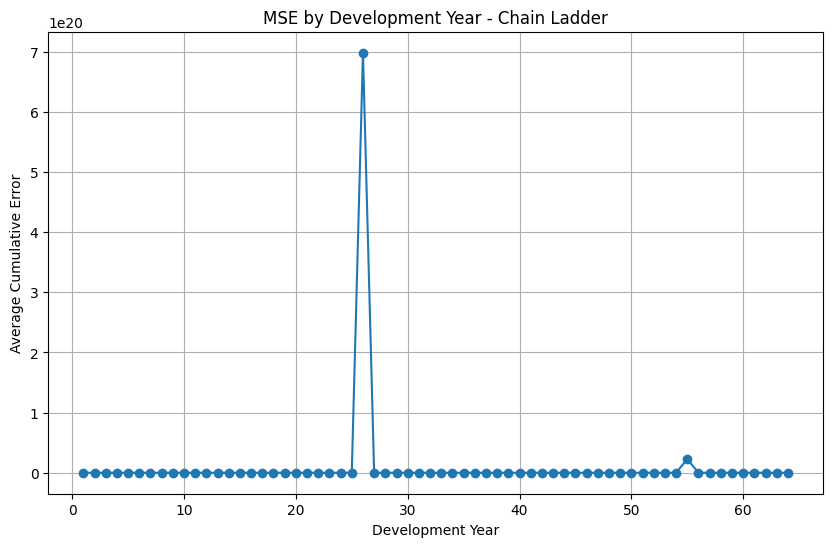

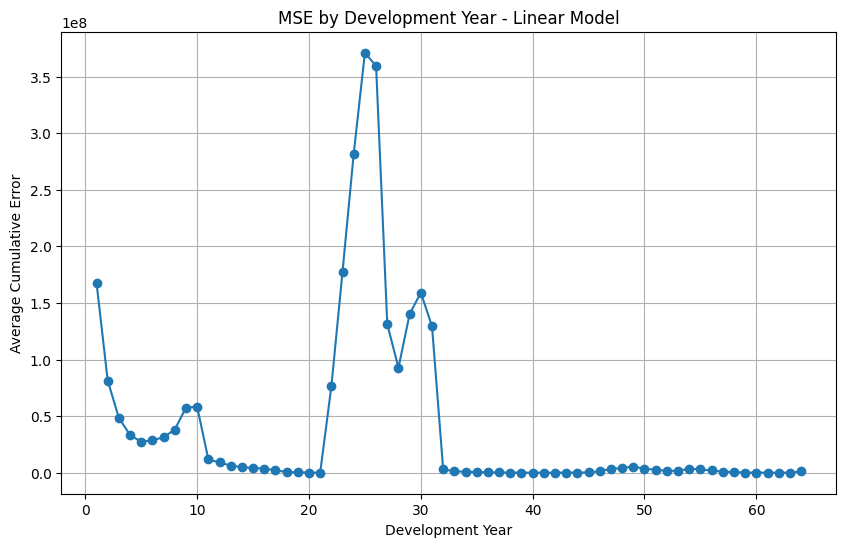

In [76]:
def plot_error_by_development_year(errors_dict, title):
    max_development_years = max(len(errors) for errors in errors_dict.values())
    cumulative_errors_by_year = np.zeros(max_development_years)
    count_by_year = np.zeros(max_development_years)

    for errors in errors_dict.values():
        for i, error in enumerate(errors):
            cumulative_errors_by_year[i] += error
            count_by_year[i] += 1

    # Calcular el promedio del error acumulativo por año de desarrollo
    average_errors_by_year = cumulative_errors_by_year / count_by_year
    development_years = range(1, max_development_years + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(development_years, average_errors_by_year, marker='o')
    plt.title(title)
    plt.xlabel('Development Year')
    plt.ylabel('Average Cumulative Error')
    plt.grid(True)
    plt.show()

# Graficar el error por año de desarrollo para cada modelo
plot_error_by_development_year(mape_errors_cl, 'MAPE by Development Year - Chain Ladder')
plot_error_by_development_year(mape_errors_lm, 'MAPE by Development Year - Linear Model')
plot_error_by_development_year(mse_errors_cl, 'MSE by Development Year - Chain Ladder')
plot_error_by_development_year(mse_errors_lm, 'MSE by Development Year - Linear Model')

The graphs you have uploaded show the Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE) by development year for both methods, Chain Ladder and Linear Model.

From the graphs, we can observe the following:

1. **MAPE by Development Year - Linear Model**: This graph shows an initially very high peak followed by a rapid decrease and then a flattening. This behavior suggests that the linear model has difficulties in accurately predicting the early development years, but its accuracy improves significantly in subsequent years.

2. **MSE by Development Year - Chain Ladder**: Similar to the MAPE of the Linear Model, there is an extremely high initial peak, indicating a very large mean squared error in the early years. This could be the result of predictions that are far from the actual values in the early development years.

3. **MAPE by Development Year - Chain Ladder**: This graph also shows a very high initial peak, although not as extreme as the MSE, which is expected since MAPE is less sensitive to large errors in individual values compared to MSE.

To interpret these graphs in the context of model effectiveness, here are some considerations:

- **Sensitivity to Large Errors**: MSE is very sensitive to large errors, which can cause very high peaks if there are predictions that deviate significantly from the actual values. This is reflected in the MSE graph for the Chain Ladder method.

- **Initial Peaks**: The initial peaks in the graphs indicate that both models have difficulties in predicting the early development years. This could be due to the natural volatility of the data in those years or a lack of stable patterns that the models can capture.

- **Stability Over Time**: The decrease and stabilization of errors suggest that the models become more accurate for later development years. This could be indicative that the data in later years exhibit more consistent patterns that the models are able to learn and predict.

To determine which model is better overall, you should calculate the overall average error across all development years for each model and then compare these values. A model with a lower overall average error would be considered to have better overall performance. Additionally, you could perform a residual analysis to identify specific patterns in the errors that the models are not capturing.